In [1]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Final_Data_For_Real.csv")
df

Unnamed: 0               artist_id           name  \
0              0  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
1              1  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
2              2  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
3              3  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
4              4  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
...          ...                     ...            ...   
7983        8925  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   
7984        8926  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   
7985        8927  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   
7986        8928  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   
7987        8929  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   

                                                 genres  popularity  \
0                                                   pop       100.0   
1                                                   pop       100.0   
2                                                   pop       100.0   
3                                                   pop       100.0   
4                                                   pop       100.0   
...                                                 ...         ...   
7983  classic country pop,country,country rock,mello...        49.0   
7984  classic country pop,country,country rock,mello...        49.0   
7985  classic country pop,country,country rock,mello...        49.0   
7986  classic country pop,country,country rock,mello...        49.0   
7987  classic country pop,country,country rock,mello...        49.0   

       followers                track_id  \
0     91680193.0  1BxfuPKGuaTgP7aM0Bbdwr   
1     91680193.0  1Iq8oo9XkmmvCQiGOfORiz   
2     91680193.0  5KD6AEm19QnMbfWpfoOHMl   
3     91680193.0  71BqAINEnezjQfxE4VuJfq   
4     91680193.0  1p80LdxRV74UKvL8gnD7ky   
...          ...                     ...   
7983    355377.0  4u2Fcnbsf2KtH7gE86vxM0   
7984    355377.0  5IHlCoNGoJ4LGEEiB8Gpbl   
7985    355377.0  5x2TUv7Y0bRdQFwvbHbtvu   
7986    355377.0  3d9AUjRiWmXwzpdqNK9kgL   
7987    355377.0  6scOdCjwpQdXLurzOw67Ry   

                                             track_name release_date  \
0                                          Cruel Summer   2019-08-23   
1     Is It Over Now? (Taylor's Version) (From The V...   2023-10-26   
2     Now That We Don't Talk (Taylor's Version) (Fro...   2023-10-26   
3           "Slut!" (Taylor's Version) (From The Vault)   2023-10-26   
4                                           Blank Space   2014-10-27   
...                                                 ...          ...   
7983          Why Have You Left The One You Left Me For   1978-06-02   
7984                            You Never Gave Up On Me   2007-01-01   
7985                       If You Ever Change Your Mind   2007-01-01   
7986                   When I Dream - 7" Single Version   1975-02-07   
7987                                         River Road   1977-01-01   

     release_date_precision  ...  mode  speechiness  acousticness  \
0                       day  ...   1.0       0.1570        0.1170   
1                       day  ...   1.0       0.0360        0.0504   
2                       day  ...   1.0       0.0338        0.1860   
3                       day  ...   1.0       0.0550        0.3450   
4                       day  ...   1.0       0.0644        0.0850   
...                     ...  ...   ...          ...           ...   
7983                    day  ...   1.0       0.1100        0.6040   
7984                    day  ...   1.0       0.0449        0.8580   
7985                    day  ...   1.0       0.0301        0.8200   
7986                    day  ...   1.0       0.0351        0.9480   
7987                    day  ...   1.0       0.0302        0.6590   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.000021    0.1050   0.5640  169.994             4.0   
1             0.000000    0.1270   0.1760  100.012             4.0   
2          

In [6]:
df['Genre'] = df['Genre'].apply(ast.literal_eval)

ValueError: malformed node or string: ['Pop']

In [ ]:
flat_genre = [genre for genres in df['Genre'] for genre in genres]

In [7]:
# Create an empty dictionary to store counts
counts = {}

# Count occurrences of each element in the list
for item in flat_genre:
    if item in counts:
        counts[item] += 1
    else:
        counts[item] = 1

counts

{'Pop': 3471,
 'Country': 824,
 'Indie': 388,
 'Rap': 1289,
 'Hip Hop': 903,
 'Reggae': 229,
 'R&B': 736,
 'Soul': 700,
 'Rock': 2714,
 'Folk': 570,
 'Funk': 215,
 'Metal': 330,
 'Punk': 156,
 'Blues': 171,
 'Jazz': 200}

/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


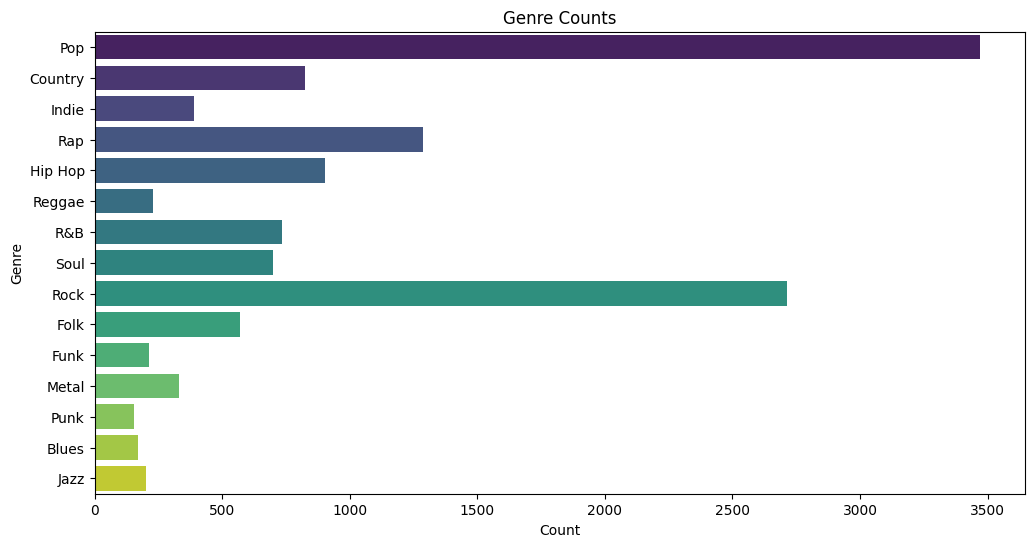

In [8]:
df2 = pd.DataFrame(list(counts.items()), columns=['Genre', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=df2, palette='viridis')
plt.title('Genre Counts')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


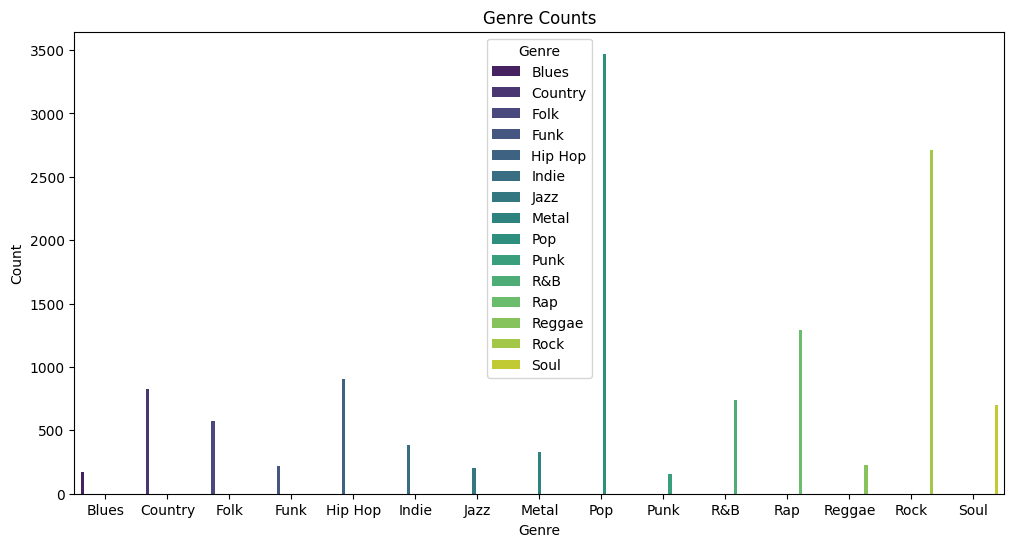

In [9]:
# Order the DataFrame by 'Genre' in alphabetical order
df2 = df2.sort_values(by='Genre')

# Create a bar plot using Seaborn with ordered genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=df2, order=df2['Genre'], hue='Genre', palette='viridis')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.savefig('genre_counts.png')
plt.show()

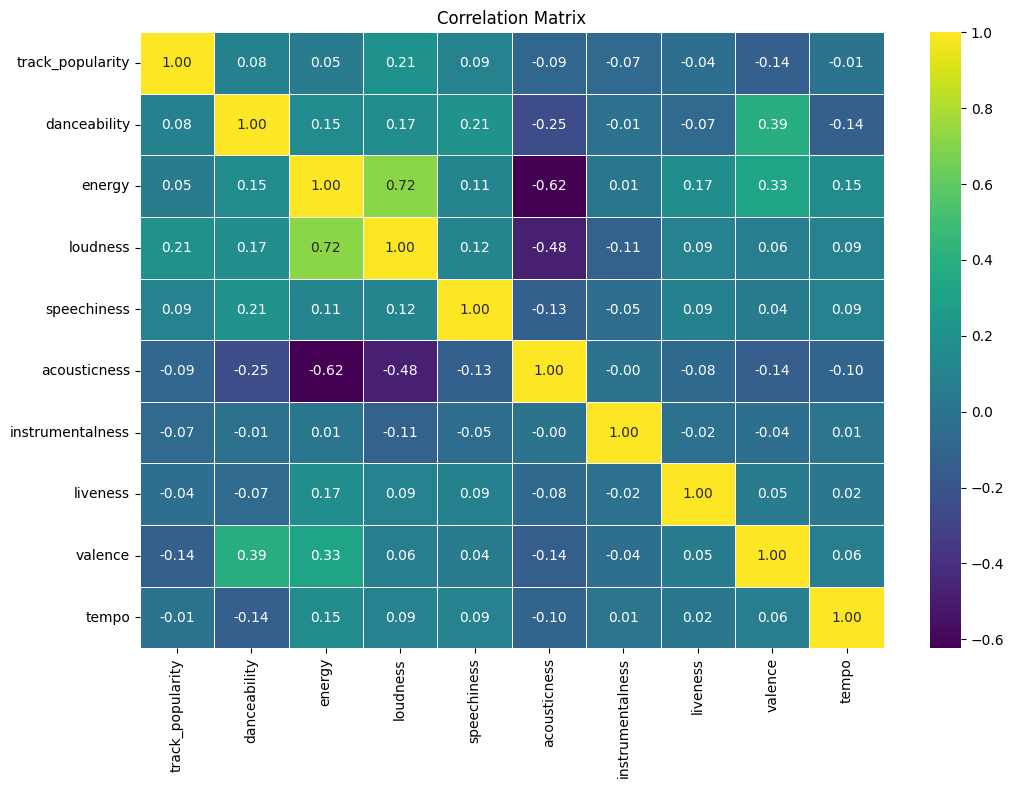

In [10]:
# Assuming df is your DataFrame
selected_columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Subset the DataFrame with selected columns
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.savefig('corr_matrix.png')

plt.show()

In [11]:
new_df = df.explode('Genre')

# Reset index to have a clean DataFrame
new_df = new_df.reset_index(drop=True)

# Display the result
new_df

Unnamed: 0               artist_id           name  \
0               0  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
1               1  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
2               2  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
3               3  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
4               4  06HL4z0CvFAxyc27GXpf02   Taylor Swift   
...           ...                     ...            ...   
12891        8927  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   
12892        8928  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   
12893        8928  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   
12894        8929  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   
12895        8929  6OheJTrDFGiyZ67F1BBLhc  Crystal Gayle   

                                                  genres  popularity  \
0                                                    pop       100.0   
1                                                    pop       100.0   
2                                                    pop       100.0   
3                                                    pop       100.0   
4                                                    pop       100.0   
...                                                  ...         ...   
12891  classic country pop,country,country rock,mello...        49.0   
12892  classic country pop,country,country rock,mello...        49.0   
12893  classic country pop,country,country rock,mello...        49.0   
12894  classic country pop,country,country rock,mello...        49.0   
12895  classic country pop,country,country rock,mello...        49.0   

        followers                track_id  \
0      91680193.0  1BxfuPKGuaTgP7aM0Bbdwr   
1      91680193.0  1Iq8oo9XkmmvCQiGOfORiz   
2      91680193.0  5KD6AEm19QnMbfWpfoOHMl   
3      91680193.0  71BqAINEnezjQfxE4VuJfq   
4      91680193.0  1p80LdxRV74UKvL8gnD7ky   
...           ...                     ...   
12891    355377.0  5x2TUv7Y0bRdQFwvbHbtvu   
12892    355377.0  3d9AUjRiWmXwzpdqNK9kgL   
12893    355377.0  3d9AUjRiWmXwzpdqNK9kgL   
12894    355377.0  6scOdCjwpQdXLurzOw67Ry   
12895    355377.0  6scOdCjwpQdXLurzOw67Ry   

                                              track_name release_date  \
0                                           Cruel Summer   2019-08-23   
1      Is It Over Now? (Taylor's Version) (From The V...   2023-10-26   
2      Now That We Don't Talk (Taylor's Version) (Fro...   2023-10-26   
3            "Slut!" (Taylor's Version) (From The Vault)   2023-10-26   
4                                            Blank Space   2014-10-27   
...                                                  ...          ...   
12891                       If You Ever Change Your Mind   2007-01-01   
12892                   When I Dream - 7" Single Version   1975-02-07   
12893                   When I Dream - 7" Single Version   1975-02-07   
12894                                         River Road   1977-01-01   
12895                                         River Road   1977-01-01   

      release_date_precision  ...  mode  speechiness  acousticness  \
0                        day  ...   1.0       0.1570        0.1170   
1                        day  ...   1.0       0.0360        0.0504   
2                        day  ...   1.0       0.0338        0.1860   
3                        day  ...   1.0       0.0550        0.3450   
4                        day  ...   1.0       0.0644        0.0850   
...                      ...  ...   ...          ...           ...   
12891                    day  ...   1.0       0.0301        0.8200   
12892                    day  ...   1.0       0.0351        0.9480   
12893                    day  ...   1.0       0.0351        0.9480   
12894                    day  ...   1.0       0.0302        0.6590   
12895                    day  ...   1.0       0.0302        0.6590   

       instrumentalness  liveness  valence    tempo  time_signature    Genre  \
0              0.000021    0.1050   0.5640  169.994             4.0      Pop   
1 

/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scottbrown/byu/stat386/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

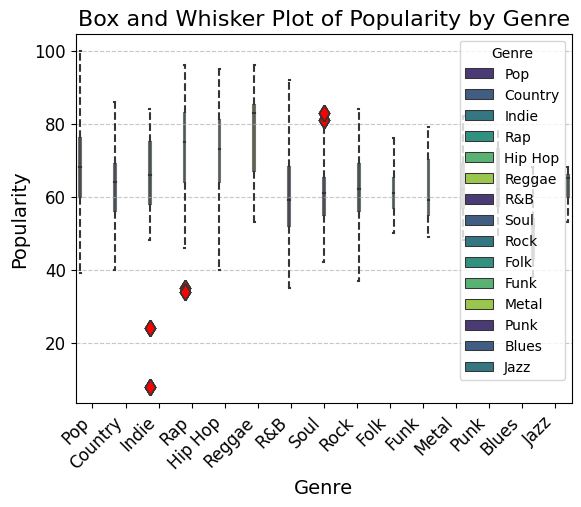

In [12]:
custom_palette = sns.color_palette("viridis")

# Customize boxplot elements
boxplot = sns.boxplot(x='Genre', y='popularity', data=new_df, hue='Genre', palette=custom_palette, boxprops=dict(alpha=0.7), whiskerprops=dict(linestyle='--'), flierprops=dict(markerfacecolor='red', markersize=8))

# Increase figure DPI for better resolution (optional)
plt.savefig('boxplot.png', dpi=300)

plt.title('Box and Whisker Plot of Popularity by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [22]:
new_df[new_df.Genre == 'Soul'].sort_values(by='popularity', ascending=False).head(100)

Unnamed: 0               artist_id                name  \
1583         1344  4dpARuHxo51G3z768sgnrY               Adele   
1581         1343  4dpARuHxo51G3z768sgnrY               Adele   
1599         1352  4dpARuHxo51G3z768sgnrY               Adele   
1597         1351  4dpARuHxo51G3z768sgnrY               Adele   
1595         1350  4dpARuHxo51G3z768sgnrY               Adele   
1593         1349  4dpARuHxo51G3z768sgnrY               Adele   
1591         1348  4dpARuHxo51G3z768sgnrY               Adele   
1589         1347  4dpARuHxo51G3z768sgnrY               Adele   
1587         1346  4dpARuHxo51G3z768sgnrY               Adele   
1585         1345  4dpARuHxo51G3z768sgnrY               Adele   
404           295  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
402           294  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
410           298  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
420           303  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
418           302  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
416           301  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
414           300  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
412           299  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
408           297  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
406           296  2h93pZq0e7k5yf4dywlkpM         Frank Ocean   
2804         2253  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2796         2249  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2798         2250  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2800         2251  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2802         2252  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2812         2257  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2806         2254  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2810         2256  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2816         2259  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2814         2258  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2808         2255  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2794         2248  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
2818         2260  3fMbdgg4jU18AjLCKBhRSm     Michael Jackson   
3626         2848  3DiDSECUqqY1AuBP8qtaIa         Alicia Keys   
3629         2849  3DiDSECUqqY1AuBP8qtaIa         Alicia Keys   
3620         2846  3DiDSECUqqY1AuBP8qtaIa         Alicia Keys   
3623         2847  3DiDSECUqqY1AuBP8qtaIa         Alicia Keys   
3617         2845  3DiDSECUqqY1AuBP8qtaIa         Alicia Keys   
3638         2852  3DiDSECUqqY1AuBP8qtaIa         Alicia Keys   
3635         2851  3DiDSECUqqY1AuBP8qtaIa         Alicia Keys   
3632         2850  3DiDSECUqqY1AuBP8qtaIa         Alicia Keys   
1060          902  5y2Xq6xcjJb2jVM54GHK3t         John Legend   
1062          903  5y2Xq6xcjJb2jVM54GHK3t         John Legend   
1064          904  5y2Xq6xcjJb2jVM54GHK3t         John Legend   
1066          905  5y2Xq6xcjJb2jVM54GHK3t         John Legend   
1068          906  5y2Xq6xcjJb2jVM54GHK3t         John Legend   
10260        7324  7guDJrEfX3qb6FEbdPA5qi       Stevie Wonder   
10259        7323  7guDJrEfX3qb6FEbdPA5qi       Stevie Wonder   
10267        7331  7guDJrEfX3qb6FEbdPA5qi       Stevie Wonder   
10266        7330  7guDJrEfX3qb6FEbdPA5qi       Stevie Wonder   
10265        7329  7guDJrEfX3qb6FEbdPA5qi       Stevie Wonder   
10264        7328  7guDJrEfX3qb6FEbdPA5qi       Stevie Wonder   
10263        7327  7guDJrEfX3qb6FEbdPA5qi       Stevie Wonder   
10262        7326  7guDJrEfX3qb6FEbdPA5qi       Stevie Wonder   
10261        7325  7guDJrEfX3qb6FEbdPA5qi       Stevie Wonder   
8391         6045  3koiLjNrgRTNbOwViDipeA         Marvin Gaye   
8396         6050  3koiLjNrgRTNbOwViDipeA         Marvin Gaye   
8395         6049  3koiLjNrgRTNbOwViDipeA         Marvin Gaye   
8394         6048  3koiLjNrgRTNbOwViDipeA         Marvin Gaye   
8393         6047  3koiLjNrgRTNbOwViDipeA         Marvin Gaye   
8392         6046  3koiLjNrgRTNbOwViDipeA 

<Figure size 1000x600 with 0 Axes>

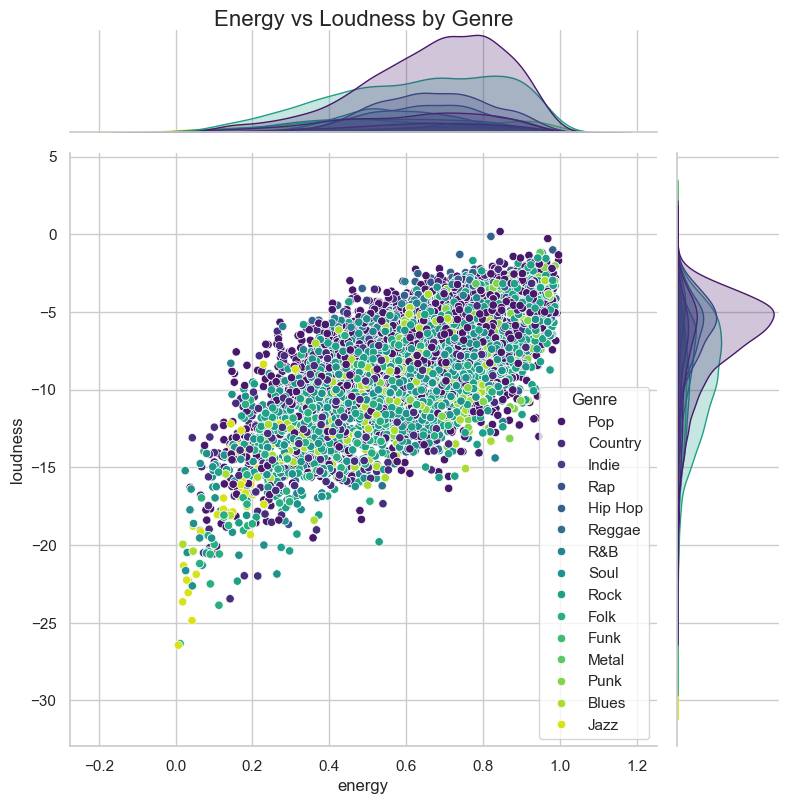

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.subplots_adjust(top=0.9)

# Create the jointplot
sns.jointplot(x='energy', y='loudness', data=new_df, hue='Genre', palette='viridis', height=8)

# Add a title to the plot
plt.title('Energy vs Loudness by Genre', y=1.2, fontsize=16)
plt.show()

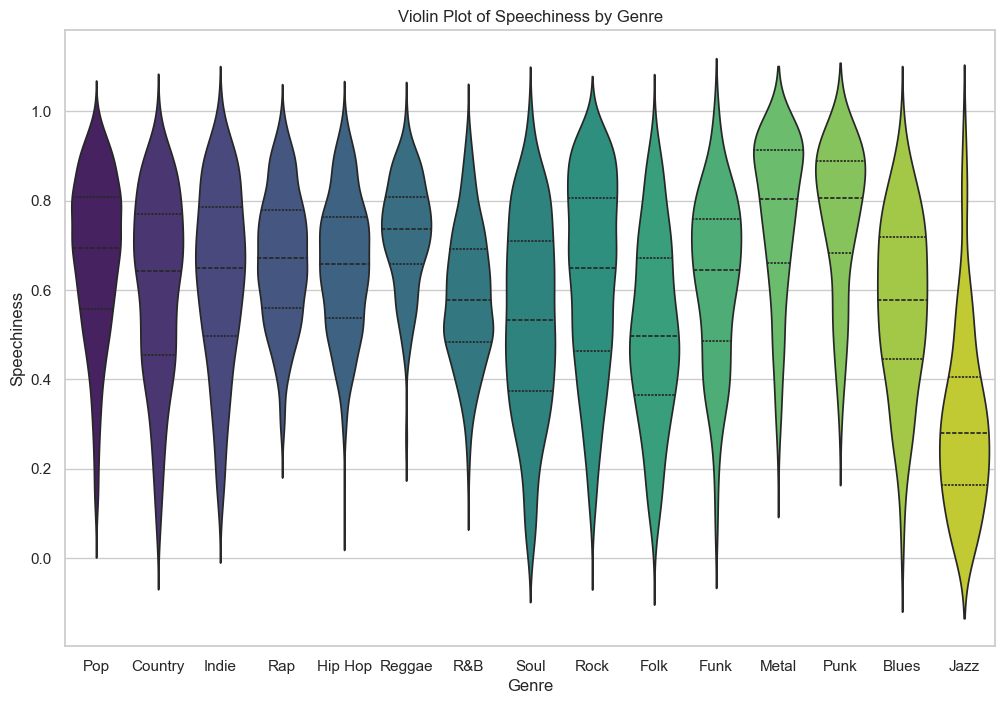

In [17]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Genre', y='energy', data=new_df, hue='Genre', palette='viridis', inner='quartile')
plt.title('Violin Plot of Speechiness by Genre')
plt.xlabel('Genre')
plt.ylabel('Speechiness')
plt.show()

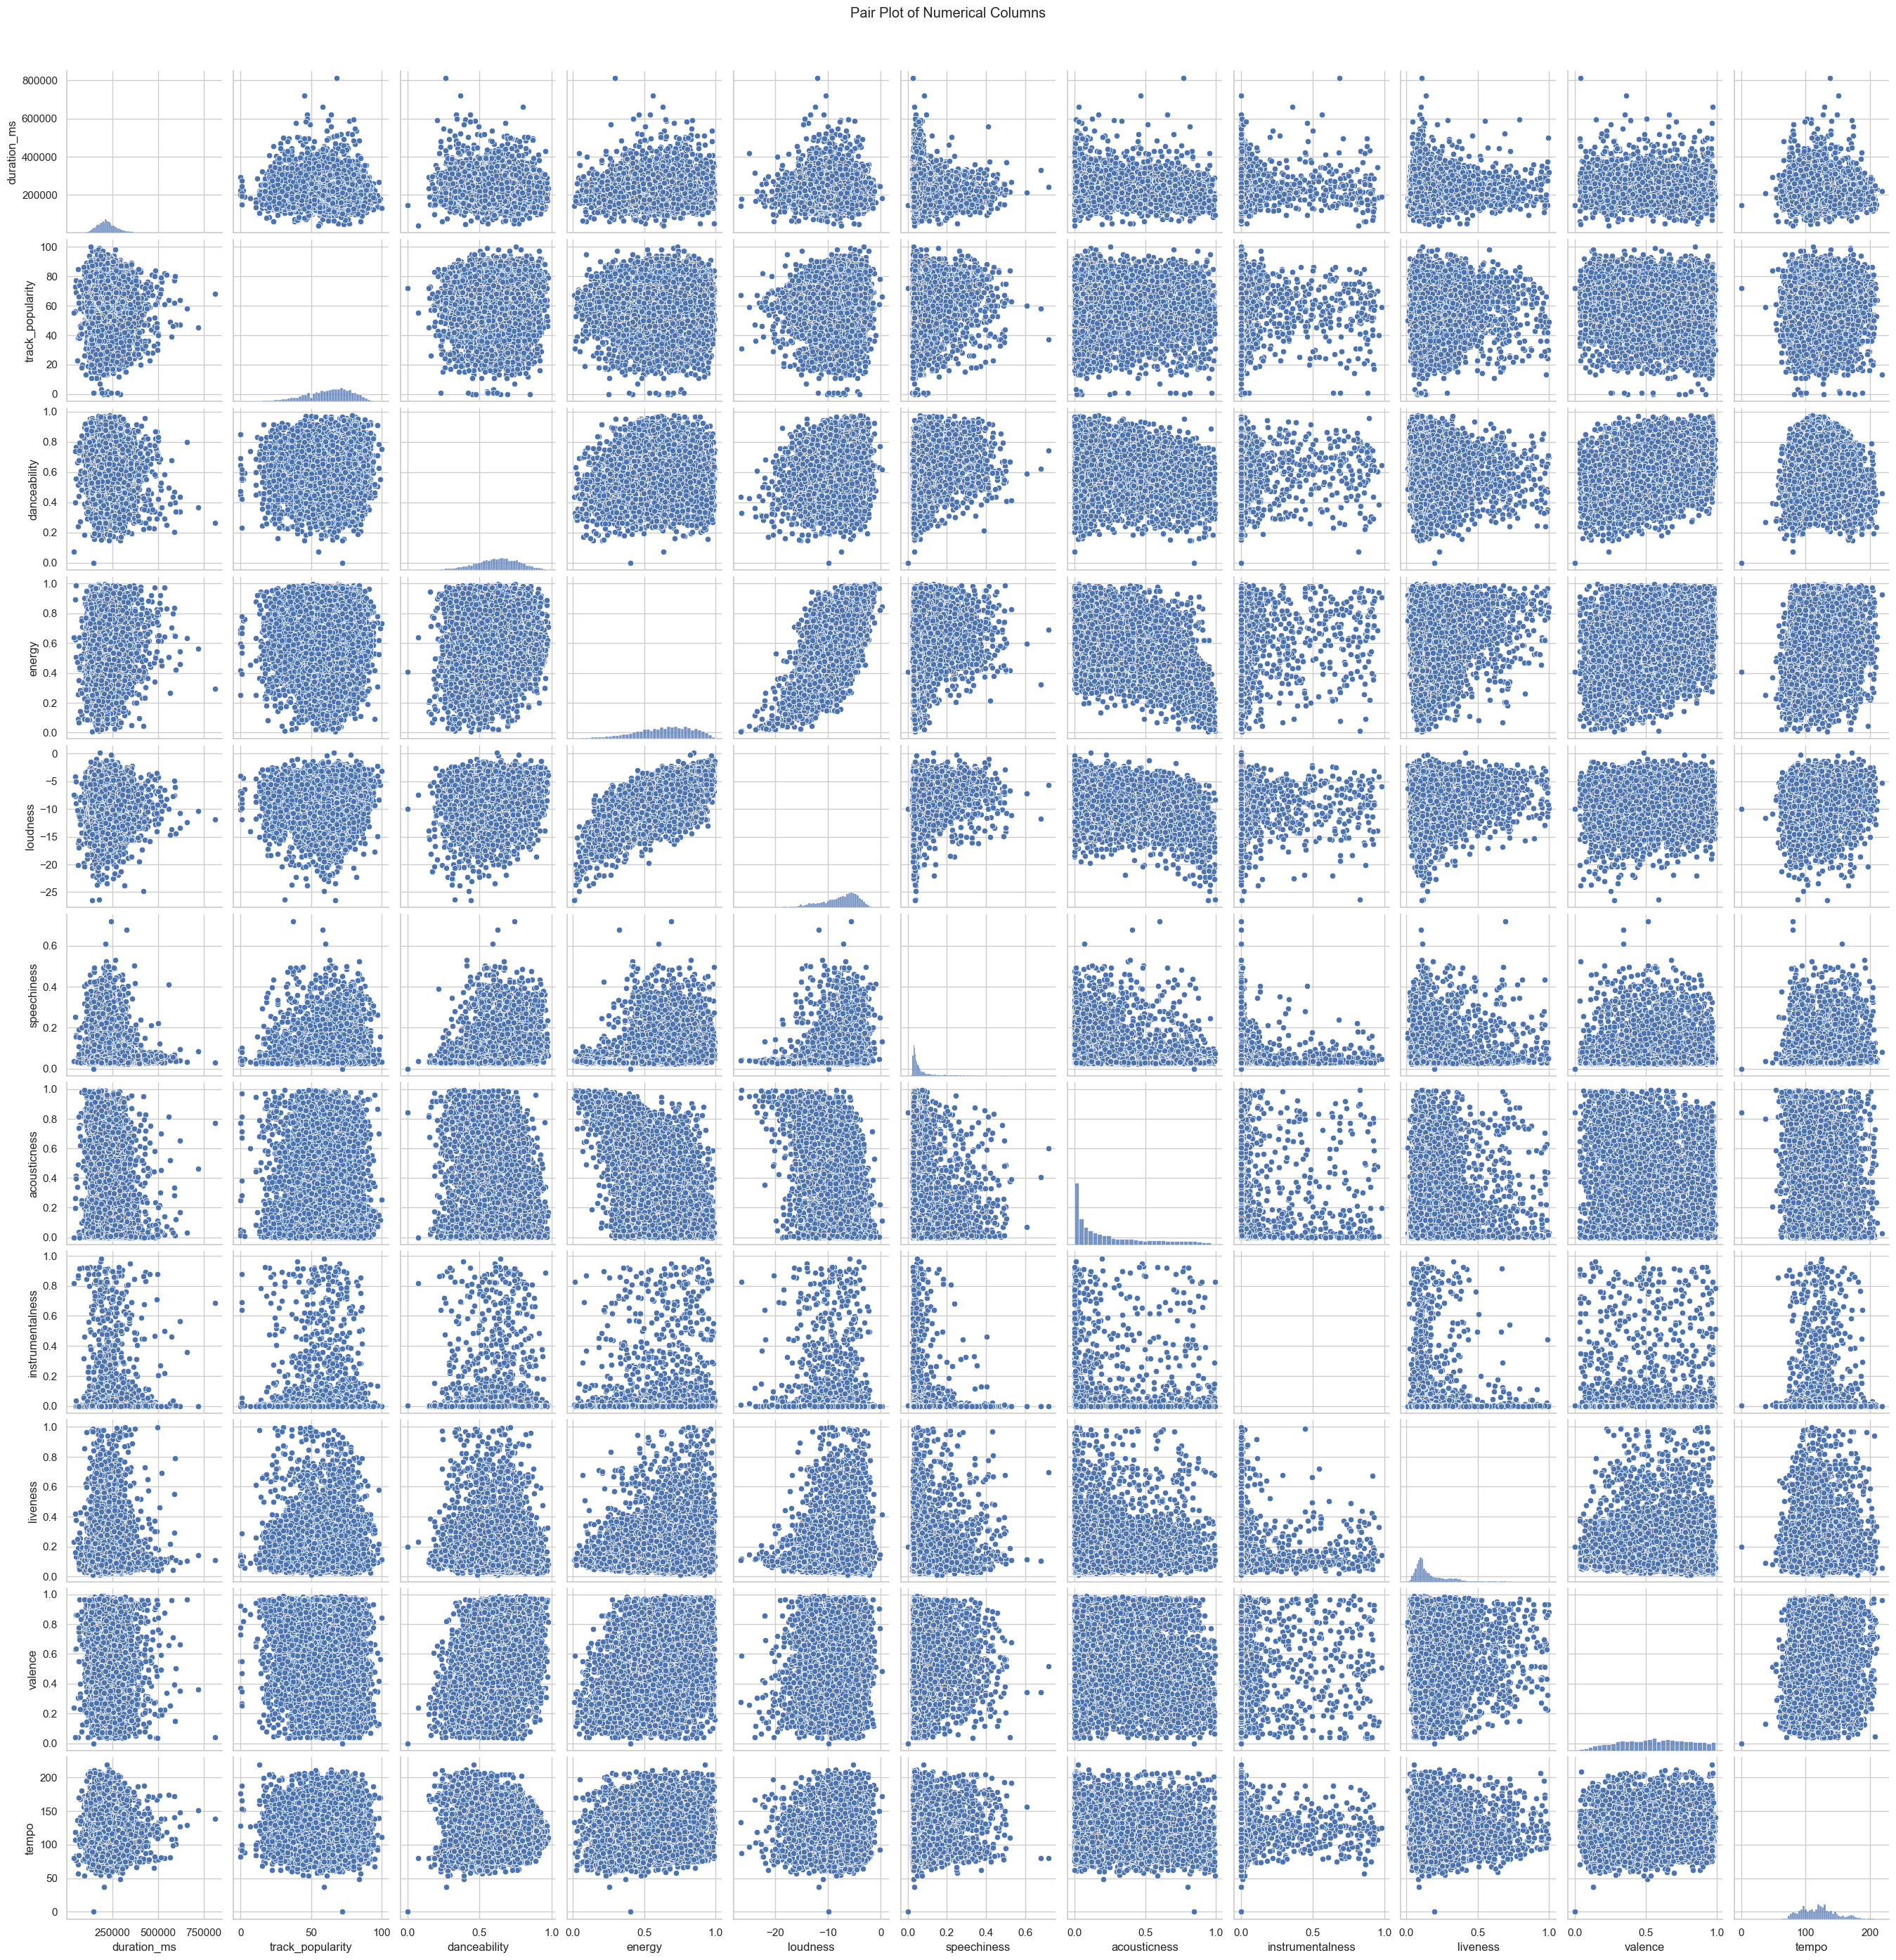

In [25]:
sns.pairplot(new_df[['duration_ms','track_popularity','danceability','energy','loudness','speechiness','acousticness', 'instrumentalness','liveness','valence','tempo']])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

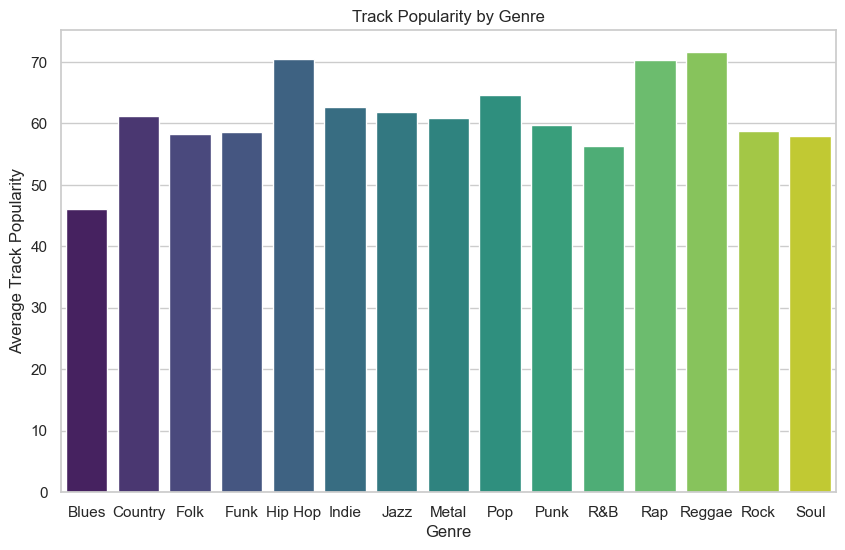

In [32]:
new_df2 = new_df.sort_values(by='Genre')

plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='track_popularity', data=new_df2, hue = 'Genre', palette='viridis', errorbar=None)
plt.title('Track Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Track Popularity')
plt.savefig('popularity.png', dpi=300)
plt.show()

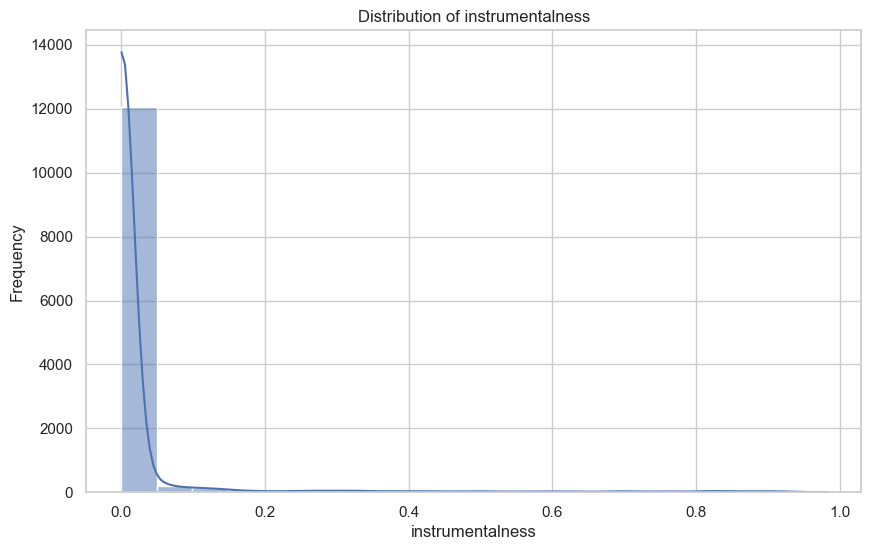

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(new_df['instrumentalness'], bins=20, kde=True)
plt.title('Distribution of instrumentalness')
plt.xlabel('instrumentalness')
plt.ylabel('Frequency')
plt.show()